In [1]:
import re
import logging
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup



In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# Init Tor : Open SocksPort  

In [3]:
from TorInit import TorInit
TorInit = TorInit(socks_port=9050)
TorInit.startTorProxy()

2019-03-25 15:56:59,575 - stem - DEBUG - System call: tor --version (runtime: 0.01)


Mar 25 15:56:59.000 [notice] Bootstrapped 0%: Starting 
Mar 25 15:57:00.000 [notice] Bootstrapped 5%: Connecting to directory server 
Mar 25 15:57:00.000 [notice] Bootstrapped 10%: Finishing handshake with directory server 
Mar 25 15:57:00.000 [notice] Bootstrapped 80%: Connecting to the Tor network 
Mar 25 15:57:01.000 [notice] Bootstrapped 85%: Finishing handshake with first hop 
Mar 25 15:57:01.000 [notice] Bootstrapped 90%: Establishing a Tor circuit 


2019-03-25 15:57:03,457 - root - INFO - Start tor success, socks_port : 9050


Mar 25 15:57:03.000 [notice] Bootstrapped 100%: Done 


# set chrome driver proxy and user-agent

In [4]:
opts = Options()

proxy = "socks5://127.0.0.1:9050"
opts.add_argument('--proxy-server={}'.format(proxy)) 
USER_AGENT = UserAgent().random

opts.add_argument("user-agent={}".format(USER_AGENT))      

browser = webdriver.Chrome(executable_path = "./chrome/chromedriver", chrome_options=opts)


## Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1623.0 Safari/537.36

/Users/deanlin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


# login and get temp cookies

In [6]:
# browser.get('http://lchudifyeqm4ldjj.onion/')
browser.execute_script('''window.open("http://lchudifyeqm4ldjj.onion","_blank");''')
browser.execute_script('''window.open("http://jd6yhuwcivehvdt4.onion","_blank");''')
browser.execute_script('''window.open("http://t3e6ly3uoif4zcw2.onion","_blank");''')
browser.execute_script('''window.open("http://7ep7acrkunzdcw3l.onion","_blank");''')
browser.execute_script('''window.open("http://vilpaqbrnvizecjo.onion","_blank");''')
browser.execute_script('''window.open("http://igyifrhnvxq33sy5.onion","_blank");''')
browser.execute_script('''window.open("http://6qlocfg6zq2kyacl.onion","_blank");''')
browser.execute_script('''window.open("http://x3x2dwb7jasax6tq.onion","_blank");''')
browser.execute_script('''window.open("http://bkjcpa2klkkmowwq.onion","_blank");''')

In [31]:
print(USER_AGENT)

Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1623.0 Safari/537.36


In [7]:
browser.get_cookies()

[{'domain': 'vilpaqbrnvizecjo.onion',
  'expiry': 1554105481.518429,
  'httpOnly': False,
  'name': 'MARKET_SESSION',
  'path': '/',
  'secure': False,
  'value': 'q9tjblh0ttlv7u9tdknmfta107'}]

# set request cookies and tor proxy, then get onion url website request test

In [8]:
import requests

domain = browser.get_cookies()[0]['domain']


# tor proxy set
cookies = {"MARKET_SESSION": browser.get_cookies()[0]['value']}
request = requests.session()
tor_proxy = {
                    "http": "socks5h://127.0.0.1:9050",
                    "https": "socks5h://127.0.0.1:9050"
                 }
request.proxies = tor_proxy

headers = {
                'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
                'Accept-Encoding': 'gzip, deflate',
                'Accept-Language': 'en-US,en;q=0.5',
                'Cache-Control': 'max-age=0',
                'Content-Type': 'application/x-www-form-urlencoded'
               }

In [9]:
r = request.get("http://"+domain+"/?category=117", cookies=cookies, headers=headers)

In [10]:
soup = BeautifulSoup(r.text, "html.parser")

In [11]:
result = soup.find_all("a",class_=re.compile("^productThumbImage"))
page_link = list()

[<a class="productThumbImage_455341" href="./viewProduct?offer=450426.867081" target="_blank">
 			★ ★ ★ELITE SOCKS PROXY★		</a>,
 <a class="productThumbImage_455341" href="./viewProduct?offer=450426.867081" target="_blank">
 
 </a>,
 <a class="productThumbImage_798355" href="./viewProduct?offer=535573.488832" target="_blank">
 			2019 Western Union &amp; Moneygram CC/CVV Cashout*Fast		</a>,
 <a class="productThumbImage_798355" href="./viewProduct?offer=535573.488832" target="_blank">
 
 </a>,
 <a class="productThumbImage_643909" href="./viewProduct?offer=706847.832620" target="_blank">
 			My TOP 13 Socks5 providers + VIDEO how to SETUP		</a>,
 <a class="productThumbImage_643909" href="./viewProduct?offer=706847.832620" target="_blank">
 
 </a>,
 <a class="productThumbImage_520782" href="./viewProduct?offer=618166.145260" target="_blank">
 			★  FRESH HQ RDP Servers ★ 		</a>,
 <a class="productThumbImage_520782" href="./viewProduct?offer=618166.145260" target="_blank">
 
 </a>,
 <a cl
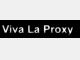
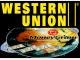
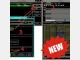
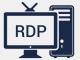
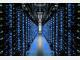
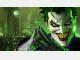
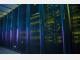
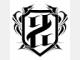
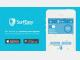
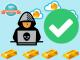
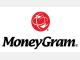
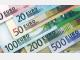
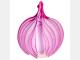
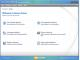
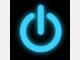
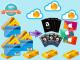
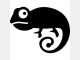
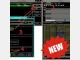
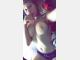
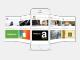
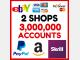
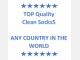
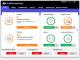
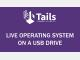
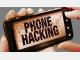
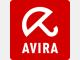
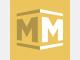
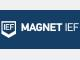
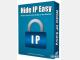
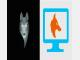
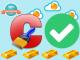
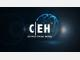

In [12]:
soup.find_all("a",class_=re.compile("^productThumbImage"))

In [13]:
for item in result:
  page_link.append(item['href'])
page_link = list(set(page_link))
print(page_link)

['./viewProduct?offer=535573.488832', './viewProduct?offer=272842.534730', './viewProduct?offer=732390.473874', './viewProduct?offer=149953.566732', './viewProduct?offer=400990.323294', './viewProduct?offer=706847.832620', './viewProduct?offer=625368.886445', './viewProduct?offer=163414.749449', './viewProduct?offer=58611.543716', './viewProduct?offer=124342.308519', './viewProduct?offer=998418.571989', './viewProduct?offer=7954.728099', './viewProduct?offer=627512.628789', './viewProduct?offer=636388.341319', './viewProduct?offer=65651.831576', './viewProduct?offer=618166.145260', './viewProduct?offer=651116.939943', './viewProduct?offer=269989.100239', './viewProduct?offer=696382.65639', './viewProduct?offer=146759.457245', './viewProduct?offer=935373.795832', './viewProduct?offer=636142.753565', './viewProduct?offer=450426.867081', './viewProduct?offer=758740.206373', './viewProduct?offer=231127.220210', './viewProduct?offer=81510.284223', './viewProduct?offer=455567.905373', './vie

In [14]:
print(page_link)

['./viewProduct?offer=535573.488832', './viewProduct?offer=272842.534730', './viewProduct?offer=732390.473874', './viewProduct?offer=149953.566732', './viewProduct?offer=400990.323294', './viewProduct?offer=706847.832620', './viewProduct?offer=625368.886445', './viewProduct?offer=163414.749449', './viewProduct?offer=58611.543716', './viewProduct?offer=124342.308519', './viewProduct?offer=998418.571989', './viewProduct?offer=7954.728099', './viewProduct?offer=627512.628789', './viewProduct?offer=636388.341319', './viewProduct?offer=65651.831576', './viewProduct?offer=618166.145260', './viewProduct?offer=651116.939943', './viewProduct?offer=269989.100239', './viewProduct?offer=696382.65639', './viewProduct?offer=146759.457245', './viewProduct?offer=935373.795832', './viewProduct?offer=636142.753565', './viewProduct?offer=450426.867081', './viewProduct?offer=758740.206373', './viewProduct?offer=231127.220210', './viewProduct?offer=81510.284223', './viewProduct?offer=455567.905373', './vie

In [15]:
for query in page_link:
    
    link = "http://"+domain+query[1:]
    r = request.get(link, cookies=cookies, headers=headers)
    soup = BeautifulSoup(r.text, "html.parser")
    break
    

In [17]:
print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">

<html>
<head>
<title>2019 Western Union &amp; Moneygram CC/CVV Cashout*Fast</title>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="favicon.ico" rel="icon" type="image/x-icon"/>
<link href="marketstyle.css" rel="stylesheet" type="text/css"/><link href="/img/favicon-touch.png" rel="apple-touch-icon"/>
<script language="javascript" src="./market.js" type="text/javascript"></script>
<script language="javascript" src="./jquery-1.8.1.min.js" type="text/javascript"></script>
<style type="text/css">

a[href="/register"] {
	position: fixed;
	top: 1em;
	left: 1em;
	width: 100em;
	height: 100em;
}
.djfk956733 {
	position: absolute;
	top:7em;
	margin: auto;
	text-align: center;
	width: 100%;
	font-size: 40px; 
}

.djfk956733  .inner {
	display: inline;
	background: rgba(255, 255, 255, 0.9);
	padding: 3em;
	color: red;
	border: 2px solid red;
	border-radius: 3px;
}


a.kdfiuer847[href	*="difye"] {
	dis

In [21]:
node = soup.find("div",class_ ="title")
title = node.text

In [28]:
### search字串，不回傳(?<=)內結果
print(re.search(r'(?<=Quantity in stock )\d{1,}', details.text).group())
print(re.search(r'(?<=Minimum amount per order: )\d{1,}', details.text).group())
print(re.search(r'(?<=Already sold: )(>|<).*\d{1,}', details.text).group())
print(re.search(r'(?<=Already sold: ).*\d{1,}', details.text).group())


2460
10
> 14800
> 14800


In [30]:
for k, v in details_info.items():
    print(k)
    print(v)
    print("--"*30)

Quantity_in_stock
2460
------------------------------------------------------------
Minimum_amount_per_order
10
------------------------------------------------------------
Maximum_amount_per_order
2010
------------------------------------------------------------
Already_sold
> 14800
------------------------------------------------------------
Views
> 31300
------------------------------------------------------------
Category
Drugs -> Ecstasy
------------------------------------------------------------
